# Data Analysis on Airline Accidents from 1985 to 2014:


## Introduction:


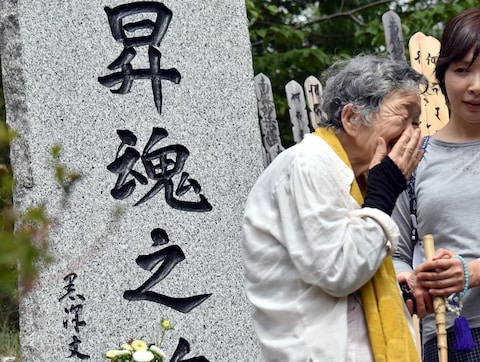

In [77]:
from IPython.display import Image
Image("C:/Users/Jesse9/Pictures/japan-airlines.png")


     
    Above as we can see is a national tragedy that occured in Japan on August 12,1985. According to reports,a total number of 520 lives were lost during this crash making it the second largest crash in history. Alot of similar incidents has been recorded after this. Now we ask ourselves, how have airlines expanded in terms of safety over the recent years? Has flying by air gotten safer over the period of 30 years? Does economic development have a role to play in airline safety? Does customer prefernce to some particular airlines have anythiing to do wih safety? We would find out in this analysis. 
    
## Objectives:
    The objective of this study is to find out the following:
         -  The top five safest airlines to ply on. 
         -  The bottom five airlines to ply on.
         -  Correlation between airline incidents occured and fatalities resulted.
        


## Data Overview:
 The following data was gotten from __[Airline Safety Network Database](https://aviation-safety.net/index.php)__
    .Showing the data in pandas,we would get:
       

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
airline = pd.read_csv(r'C:\Users\Jesse9\Documents\HTML\airline-safety.csv')
print airline

                       airline  avail_seat_km_per_week  incidents_85_99  \
0                   Aer Lingus               320906734                2   
1                    Aeroflot*              1197672318               76   
2        Aerolineas Argentinas               385803648                6   
3                  Aeromexico*               596871813                3   
4                   Air Canada              1865253802                2   
5                   Air France              3004002661               14   
6                   Air India*               869253552                2   
7             Air New Zealand*               710174817                3   
8             Alaska Airlines*               965346773                5   
9                     Alitalia               698012498                7   
10          All Nippon Airways              1841234177                3   
11                   American*              5228357340               21   
12           Austrian Air

In [30]:
airline.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [31]:
airline.tail()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
51,United / Continental*,7139291291,19,8,319,14,2,109
52,US Airways / America West*,2455687887,16,7,224,11,2,23
53,Vietnam Airlines,625084918,7,3,171,1,0,0
54,Virgin Atlantic,1005248585,1,0,0,0,0,0
55,Xiamen Airlines,430462962,9,1,82,2,0,0


### Key:
-  airline: The Name of the Airlines: both international and regional(denoted by asterisks)
-  avail_seat_km_per_week: Available Seat Kilometres Flown per Week
-  incidents_85_99: Incidents that occured from 1985 to 1999
-  fatal_accidents_85_99: Fatal accidents that occured from 1985 to 1999
-  fatalities_85_99: Fatalities that occured from 1985 to 1999
-  incidents_00_14: Incidents that occured from 2000 to 2014
-  fatal_accidents_00_14: Fatal accidents that occured from 2000 to 2014
-  fatalities_00_14: Fatalities that occured from 2000 to 2014


 ### Info on Data:

In [33]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.3+ KB


In [34]:
print "Data Size:",airline.shape

Data Size: (56, 8)


### Description of data for numerical features:

In [39]:
airline.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


## Data Exploration:

## Correlation between incidents from 1985-1999 and 2000-2014:


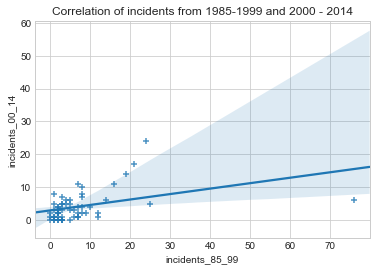

In [46]:
sns.set_style('whitegrid')
sns.regplot(airline['incidents_85_99'],airline['incidents_00_14'], marker = '+')
plt.title('Correlation of incidents from 1985-1999 and 2000 - 2014')
#sns.annotate()
plt.show()

From the graph above,we can see that incidents that occur from 1985-1999 and 2000-2014 are somewhat related to one another.

## Correlation between Fatal Accidents from 1985-1999 and 2000-2014:

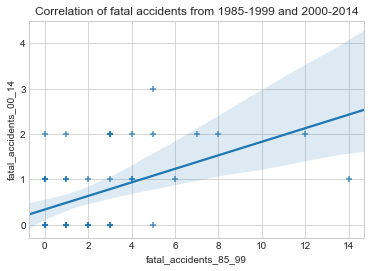

In [48]:
sns.regplot(airline['fatal_accidents_85_99'],airline['fatal_accidents_00_14'], marker = '+')
plt.title('Correlation of fatal accidents from 1985-1999 and 2000-2014')
plt.show()

From the plot above, it can be seen that fatal accidents that occured from 1985-1999 and 2000-2014 are also slightly predictable with some countries which had high number of incidents recording more fatal accidents compared to others.

## Correlation between Fatalities from 1985-1999 and 2000-2014:
 

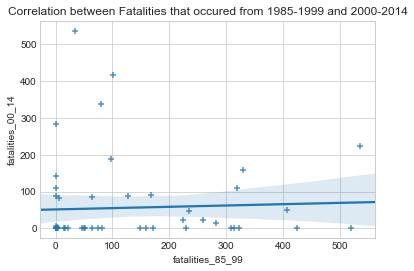

In [49]:
sns.regplot(airline['fatalities_85_99'],airline['fatalities_00_14'], marker = '+')
plt.title('Correlation between Fatalities that occured from 1985-1999 and 2000-2014')
plt.show()

From the plot above,it can be deduced that there is no correlation between fatalities that occured from 1985-1999 and 2000-2014

## Top 10 Safest Airlines to Ply:

### From 1985 to 1999:

In [13]:
airline.nsmallest(10,'incidents_85_99')

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
15,Cathay Pacific*,2582459303,0,0,0,2,0,0
26,Hawaiian Airlines,493877795,0,0,0,1,0,0
48,TAP - Air Portugal,619130754,0,0,0,0,0,0
12,Austrian Airlines,358239823,1,0,0,1,0,0
21,El Al,335448023,1,1,4,1,0,0
23,Finnair,506464950,1,0,0,0,0,0
25,Gulf Air,301379762,1,0,0,3,1,143
37,Qantas*,1917428984,1,0,0,5,0,0
43,Southwest Airlines,3276525770,1,0,0,8,0,0
54,Virgin Atlantic,1005248585,1,0,0,0,0,0


### From 2000 to 2014:

In [16]:
airline.nsmallest(10,'incidents_00_14')

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
13,Avianca,396922563,5,3,323,0,0,0
17,Condor,417982610,2,1,16,0,0,0
18,COPA,550491507,3,1,47,0,0,0
23,Finnair,506464950,1,0,0,0,0,0
28,Japan Airlines,1574217531,3,1,520,0,0,0
32,LAN Airlines,1001965891,3,2,21,0,0,0
48,TAP - Air Portugal,619130754,0,0,0,0,0,0
54,Virgin Atlantic,1005248585,1,0,0,0,0,0
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0


From the tables above,we can see Airlines like the TAP- Air portugal, Virgin Atlantic and Finn Air reoccuring as part of the top 10 safest airlines over the period of 30 years.

Calculating the Safety Score:
   In order to calculate the safety score,we do the following:
   -  Subtract an airline’s crash rate from the average for all airlines since 1985. This gives safer airlines positive scores and less safe airlines negative scores.
   -  Multiply the result gotten by the square root of the number of seat kilometres.
   -  __[Standardize the score]("https://en.wikipedia.org/wiki/Standard_score")__ and get the average of the three categories.

### Safety Score:


In [65]:
avail_seat_km_per_week = airline['avail_seat_km_per_week']
avail_seat_km = avail_seat_km_per_week * 7
total_avail = avail_seat_km.sum()#gets the sum of available seat km 

#For 1985 to 1999
incidents_85_99 = airline['incidents_85_99']
fatalities_85_99 = airline['fatalities_85_99']
fatal_accidents_85_99 = airline['fatal_accidents_85_99']

# For 2000 to 2014
incidents_00_14 = airline['incidents_00_14']
fatalities_00_14 = airline['fatalities_00_14']
fatal_accidents_00_14 = airline['fatal_accidents_00_14']

#for incidents from 1985 to 1999
crash_rate_1 = ( incidents_85_99 * ((avail_seat_km) / total_avail))# gets the crash rate
average_crash_rate_1 = crash_rate_1.mean()#gets the average crash rate
crash_diff_1 = average_crash_rate_1 - crash_rate_1#gets the difference between actual and average crash rate
crash_diff_seat_1 = crash_diff_1 * ((avail_seat_km).apply(np.sqrt))
crash_diff_seat_mean_1 = crash_diff_seat_1.mean()#gets the mean of crash_diff_seat
crash_diff_seat_dev_1 = crash_diff_seat_1.std()#gets the standard deviation of crash_diff_seat
standard_score_1 = (crash_diff_seat_1- crash_diff_seat_mean_1) / crash_diff_seat_dev_1
                
#for fatal accidents from 1985 to 1999
crash_rate_2 = ( fatal_accidents_85_99 * ((avail_seat_km) / total_avail))
average_crash_rate_2 = crash_rate_2.mean()
crash_diff_2 = average_crash_rate_2 - crash_rate_2
crash_diff_seat_2 = crash_diff_2 * ((avail_seat_km).apply(np.sqrt))
crash_diff_seat_mean_2 = crash_diff_seat_2.mean()
crash_diff_seat_dev_2 = crash_diff_seat_2.std()
standard_score_2 = (crash_diff_seat_2 - crash_diff_seat_mean_2) / crash_diff_seat_dev_2

#for fatalities from 1985 to 1999
crash_rate_3 = ( fatalities_85_99 * ( avail_seat_km / total_avail))
average_crash_rate_3 = crash_rate_3.mean()
crash_diff_3 = average_crash_rate_3 - crash_rate_3
crash_diff_seat_3 = crash_diff_3 * ((avail_seat_km).apply(np.sqrt))
crash_diff_seat_mean_3 = crash_diff_seat_3.mean()
crash_diff_seat_dev_3 = crash_diff_seat_3.std()
standard_score_3 = (crash_diff_seat_3 - crash_diff_seat_mean_3) / crash_diff_seat_dev_3
                
                
#for incidents from 2000 to 2014
crash_rate_4 = ( incidents_00_14 * (avail_seat_km/ total_avail))
average_crash_rate_4 = crash_rate_4.mean()
crash_diff_4 = average_crash_rate_4 - crash_rate_4
crash_diff_seat_4 = crash_diff_4 * ((avail_seat_km).apply(np.sqrt))
crash_diff_seat_mean_4 = crash_diff_seat_4.mean()
crash_diff_seat_dev_4 = crash_diff_seat_4.std()
standard_score_4 = (crash_diff_seat_4- crash_diff_seat_mean_4) / crash_diff_seat_dev_4
    

 #for fatal accidents from 2000 to 2014
crash_rate_5 = ( fatal_accidents_00_14 * (avail_seat_km / total_avail))
average_crash_rate_5 = crash_rate_5.mean()
crash_diff_5 = average_crash_rate_5 - crash_rate_5
crash_diff_seat_5 = crash_diff_5 * ((avail_seat_km).apply(np.sqrt))
crash_diff_seat_mean_5 = crash_diff_seat_5.mean()
crash_diff_seat_dev_5 = crash_diff_seat_5.std()
standard_score_5 = (crash_diff_seat_5 - crash_diff_seat_mean_5) / crash_diff_seat_dev_5               
                              
                
#For fatalities from 2000 to 2014
crash_rate_6 = ( fatalities_00_14 * ( avail_seat_km / total_avail))
average_crash_rate_6 = crash_rate_6.mean()
crash_diff_6 = average_crash_rate_6 - crash_rate_6
crash_diff_seat_6 = crash_diff_6 * ((avail_seat_km).apply(np.sqrt))
crash_diff_seat_mean_6 = crash_diff_seat_6.mean()
crash_diff_seat_dev_6 = crash_diff_seat_6.std()
standard_score_6 = (crash_diff_seat_6 - crash_diff_seat_mean_6) / crash_diff_seat_dev_6

#To calculate the safety score of events from 1985 to 1999
safety_score_1 = (standard_score_1 + standard_score_2 + standard_score_3) / 3

#To calculate the safety score of events from 2000 to 2014
safety_score_2 = (standard_score_4 + standard_score_5 + standard_score_6) / 3

#To calculate average safety score
average_safety_score = (safety_score_1 + safety_score_2 ) / 2


Adding this data to the existing table to show this score:

In [60]:
airline['Safety_Score_85_99'] = safety_score_1
airline['Safety_Score_00_14'] = safety_score_2
airline['Average_Safety_Score'] = average_safety_score
print airline

                       airline  avail_seat_km_per_week  incidents_85_99  \
0                   Aer Lingus               320906734                2   
1                    Aeroflot*              1197672318               76   
2        Aerolineas Argentinas               385803648                6   
3                  Aeromexico*               596871813                3   
4                   Air Canada              1865253802                2   
5                   Air France              3004002661               14   
6                   Air India*               869253552                2   
7             Air New Zealand*               710174817                3   
8             Alaska Airlines*               965346773                5   
9                     Alitalia               698012498                7   
10          All Nippon Airways              1841234177                3   
11                   American*              5228357340               21   
12           Austrian Air

Now showing just the names of airlines, safety scores and average safety score. We get:

In [67]:
airline2 = airline[airline.columns.difference(['avail_seat_km_per_week', 'incidents_85_99','fatal_accidents_85_99','fatalities_85_99','incidents_00_14','fatal_accidents_00_14','fatalities_00_14'])]
airline2.nsmallest(10,'Safety_Score_00_14')

,Average_Safety_Score,Safety_Score_00_14,Safety_Score_85_99,airline
11,-2.976133,-4.384230,-1.568035,American*
51,-3.898156,-3.409139,-4.387172,United / Continental*
19,-4.307101,-3.340557,-5.273644,Delta / Northwest*
5,-0.602485,-0.988586,-0.216384,Air France
52,-0.285870,-0.183862,-0.387878,US Airways / America West*
50,0.043288,-0.071955,0.158530,Turkish Airlines
34,0.119075,-0.052706,0.290856,Malaysia Airlines
47,0.074865,-0.035542,0.185272,TAM
41,0.185472,0.068448,0.302496,Singapore Airlines
1,-0.086605,0.180697,-0.353906,Aeroflot*


## Conclusion:

As we can see above,__[GDP of countries]("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita")__ bare no correlation with the crashes occured therefore disproving that GDP plays a role in incidents occured in airline safety.